#📦Imports

In [5]:
from google.colab import drive
drive.mount('/content/drive')
pad_naar_csv = '/content/drive/MyDrive/data/bestand.csv'

df = pd.read_csv(pad_naar_csv)

from pandas.api.types import CategoricalDtype
import numpy as np                      # Numerieke berekeningen
import pandas as pd                     # Dataframes
import seaborn as sns                   # Geavanceerde visualisaties
import matplotlib.pyplot as plt         # Basisvisualisaties
import scipy.stats as stats             # Statistische functies
from statsmodels.graphics.mosaicplot import mosaic  # Mozaïekdiagram
import numpy as np
from scipy import stats
import scipy.stats as stats
import math
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import random
import math

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns
from scipy.stats import norm
from scipy.stats import norm, t
from scipy import stats
import numpy as np
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats import chisquare
from scipy.stats import pearsonr
import numpy as np
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 🧠Module 1 Cheatsheet: Samples & Jupyter Notebooks

Dataset openen & verkennen

In [ ]:
df = pd.read_csv('url_of_path.csv')
df.head()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/path/file.csv')


In [ ]:
print(len(df))              # aantal rijen
print(len(df.columns))      # aantal kolommen
print(df.shape)             # (rijen, kolommen)
df.info()                  # details data types, non-null
print(df.dtypes)
print(df.dtypes.value_counts())


index instellen

In [ ]:
df.set_index('PassengerId', inplace=True)


categorien & ordinaal maken (volgorde is van belang)

In [ ]:
df['Survived'] = df['Survived'].astype('category')

from pandas.api.types import CategoricalDtype
order = CategoricalDtype(categories=['S','C','Q'], ordered=True)
df['Embarked'] = df['Embarked'].astype(order)


tekst selecteren

In [ ]:
df['Age']
df.Age

df[['Name', 'Age']]

df.iloc[5]
df.iloc[0:4]  # eerste 4 rijen

df[df.Age < 18]
df2 =df.query("(Sex=='male') and (Age < 18)")
df2.head()

Omgaan met ontbrekende waarden (missing data)

In [ ]:
df.drop('PassengerId', axis=1, inplace=True)

df.dropna(inplace=True)              # rijen met minimaal 1 missing value
df.dropna(how='all', inplace=True)   # alleen rijen met alleen missing values

df.count()  #telt aantal rijen
df.notnull().sum() # som van alle niet null data


avg_age = df['Age'].mean()  #invullen van de data
df['Age'] = df['Age'].fillna(avg_age)


# 📊 Reflectie & Theorie Module 1









## Meetniveaus

| Meetniveau | Kenmerken                         | Voorbeeld                 |
|------------|----------------------------------|---------------------------|
| Nominaal   | Categorisch, geen volgorde        | Geslacht, kleuren          |
| Ordinaal   | Categorisch met volgorde          | Opleidingsniveau, klanttevredenheid |
| Interval   | Numeriek, gelijke intervallen, geen absoluut nulpunt | Temperatuur in °C         |
| Ratio      | Numeriek, absoluut nulpunt        | Gewicht, leeftijd          |


## Sampling Methods

| Methode           | Kenmerken                                | Voor- en nadelen                         | Mogelijke fouten              |
|-------------------|-----------------------------------------|-----------------------------------------|------------------------------|
| Quota sampling    | Niet-random, op basis van proporties     | Snel, makkelijk, maar mogelijk niet representatief | Selectiebias, vertekening    |
| Random sampling   | Elke eenheid gelijke kans                 | Objectief, eenvoudig                    | Kan bij kleine steekproef variëren |
| Stratified sampling | Populatie verdeeld in strata, random per strata | Representatief voor subgroepen         | Vereist kennis van strata     |

# 🧠Module 2  Univariate Analysis

In [ ]:
import numpy as np                      # Numerieke berekeningen
import pandas as pd                     # Dataframes
import seaborn as sns                   # Geavanceerde visualisaties
import matplotlib.pyplot as plt         # Basisvisualisaties
import scipy.stats as stats             # Statistische functies
from statsmodels.graphics.mosaicplot import mosaic  # Mozaïekdiagram


## 📊 Datasetvoorbeeld


In [ ]:
tips = sns.load_dataset("tips")
tips.head()  # bekijk eerste rijen

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 🎨 Visualisaties

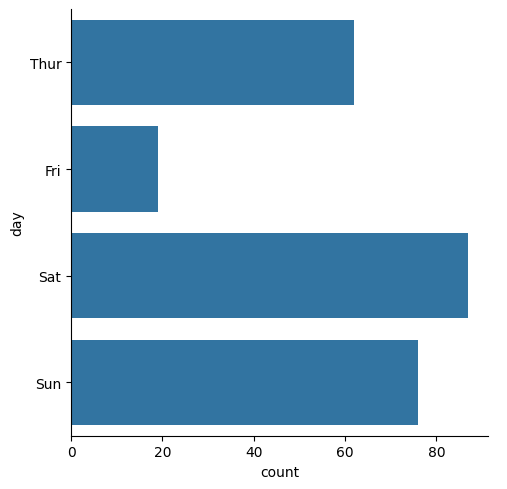

In [ ]:
#Categorische variabelen (kwalitatief)
sns.catplot(data=tips, kind='count', y='day')

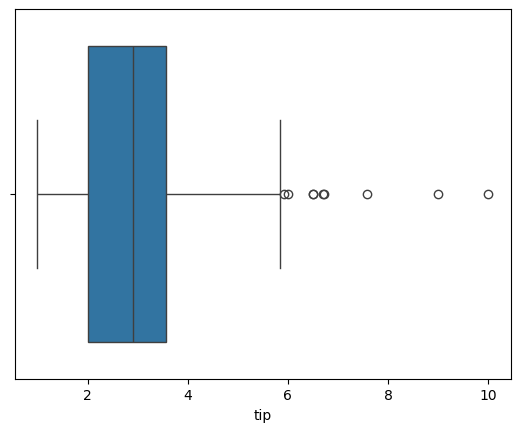

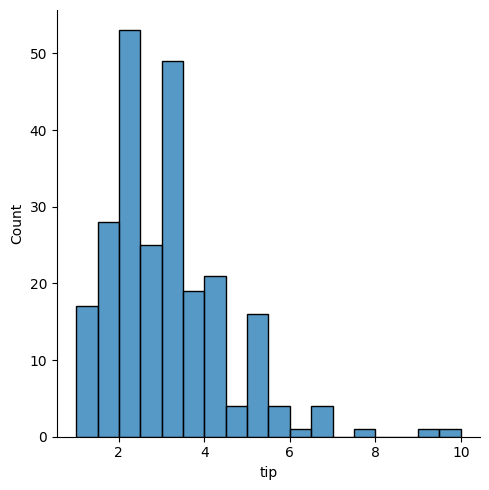

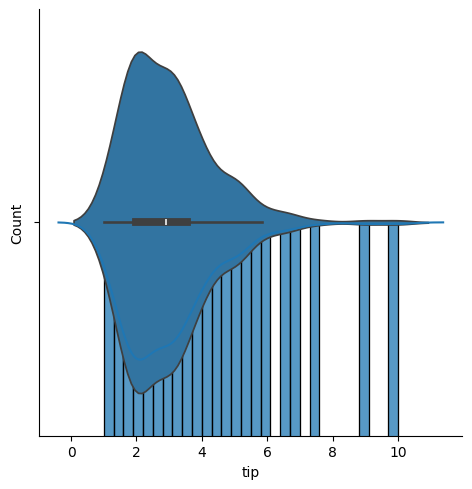

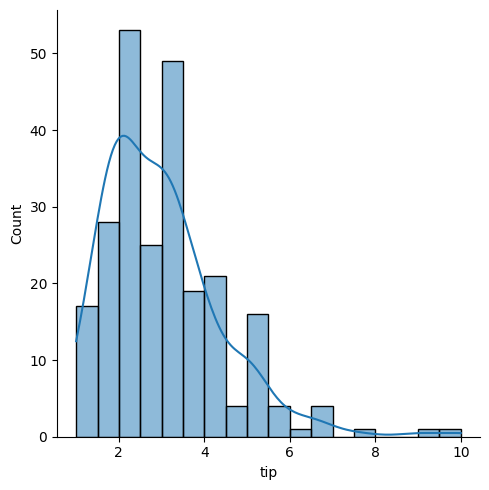

In [ ]:
# Numerieke variabelen (kwantitatief)

sns.boxplot(data=tips, x='tip')               # Boxplot
sns.displot(data=tips, x='tip')               # Histogram
sns.displot(data=tips, x='tip', bins=30)      # Histogram met 30 bins
sns.kdeplot(data=tips, x='tip')               # Density plot
sns.violinplot(data=tips, x='tip')            # Violin plot
sns.displot(data=tips, x='tip', kde=True)     # Histogram + density


In [ ]:

print("Descriptive Statistics:")
print(tips.tip.describe())
print("\nMean:", tips.tip.mean())
print("Median:", tips.tip.median())
print("Standard Deviation:", tips.tip.std())
print("Variance:", tips.tip.var())
print("Min, Max:", tips.tip.min(), tips.tip.max())
print("\nPercentiles:")
print(tips.tip.quantile([0.0, 0.25, 0.5, 0.75, 1.0,]))
print("\nIQR:", stats.iqr(tips.tip))

Descriptive Statistics:
count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

Mean: 2.99827868852459
Median: 2.9
Standard Deviation: 1.3836381890011826
Variance: 1.9144546380624725
Min, Max: 1.0 10.0

Percentiles:
0.00     1.0000
0.25     2.0000
0.50     2.9000
0.75     3.5625
1.00    10.0000
Name: tip, dtype: float64

IQR: 1.5625


### Vorm van de verdeling

In [ ]:
print(tips.tip.skew()  )    # Scheefheid (skewness)
print(tips.tip.kurtosis())  # Kurtosis (spitsheid)


1.4654510370979401
3.648375873352852


### 📏Populatie vs steekproef (standaardafwijking)

In [ ]:
def pop_var(x): return np.var(x, ddof=0)
def sample_var(x): return np.var(x, ddof=1)

def pop_sd(x): return np.std(x, ddof=0)
def sample_sd(x): return np.std(x, ddof=1)


### 🧪 Voorbeelddata & oefeningen

####  📌 Oefening 1 - Wachtijden metro (in seconden)

In [ ]:
a = np.array([87, 42, 0, 62, 124, 0, 58, 37, 74, 94, 182, 23, 17, 62, 29, 17, 82, 54, 0, 45])
print(np.median(a) )              # 49.5
print(stats.iqr(a))               # 54.5


49.5
54.5


#### 📌 Oefening 2 - Tijd in koffiebar (in minuten)

In [ ]:
times = np.array([17, 15, 9, 31, 33, 41, 8, 14, 13, 22, 27, 43, 32, 14])
print(np.median(times))           # Mediaan
print(np.ptp(times)  )            # Range (max - min)
print(np.percentile(times, [25, 75]))  # Q1 en Q3
print(stats.iqr(times) )          # IQR


19.5
35
[14.   31.75]
17.75


#### 📌 Oefening 3 - Kattennesten (frequentietabel → lijst)

In [ ]:
kittens = pd.DataFrame({'litter': [1,2,3,4,5,6,7,8], 'freq': [2,4,7,11,8,4,2,1]})
obs = np.repeat(kittens['litter'], kittens['freq'])

print(np.median(obs) )          # 4.0
print(np.mean(obs) )           # 4.13
print(np.percentile(obs, [25, 75]))  # [3.0, 5.0]


4.0
4.128205128205129
[3. 5.]


# 📊 Univariate Analyse Cheat Sheet

## 🎨 Visualisaties

### Categorievariabelen

| Plot        | Code                                 |
|-------------|--------------------------------------|
| Count plot  | `sns.catplot(kind='count', y='day')` |


### Numerieke variabelen

| Plot              | Code                                      |
|-------------------|-------------------------------------------|
| Boxplot           | `sns.boxplot(x='tip')`                    |
| Histogram         | `sns.displot(x='tip')`                    |
| Histogram (30 bins) | `sns.displot(x='tip', bins=30)`        |
| Density plot      | `sns.kdeplot(x='tip')`                    |
| Histogram + KDE   | `sns.displot(x='tip', kde=True)`          |
| Violin plot       | `sns.violinplot(x='tip')`                 |
| Scatterplot | `sns.scatterplot(x='total_bill', y='tip')` |

## 📈 Centrale tendens & spreiding



| Maat                | Code                                     |
|---------------------|------------------------------------------|
| Overzicht           | `tips.tip.describe()`                    |
| Gemiddelde          | `tips.tip.mean()`                        |
| Mediaan             | `tips.tip.median()`                      |
| Standaarddeviatie   | `tips.tip.std()`                         |
| Variantie           | `tips.tip.var()`                         |
| Min / Max           | `tips.tip.min(), tips.tip.max()`         |
| Percentielen        | `tips.tip.quantile(...)`                 |
| IQR                 | `stats.iqr(tips.tip)`                    |

## 🔁 Vorm van de verdeling

| Maat      | Code                        | Betekenis                      |
|-----------|-----------------------------|-------------------------------|
| Skewness  | `tips.tip.skew()`           | Scheefheid van de verdeling   |
| Kurtosis  | `tips.tip.kurtosis()`       | Spitsheid / uitschieters      |


## 📏 Populatie vs Steekproef

| Functie             | Code                          | Wat het doet                    |
|---------------------|-------------------------------|---------------------------------|
| Populatie SD        | `np.std(x, ddof=0)`           | Volledige populatie             |
| Steekproef SD       | `np.std(x, ddof=1)`           | (aanbevolen) steekproef         |
| Pandas standaard    | `pandas.Series.std()`         | Automatisch `ddof=1`            |

## 🧪 Praktijkoefeningen

| Oefening            | Inzicht                          | Kernfuncties                         |
|---------------------|----------------------------------|--------------------------------------|
| Metro (wachtijden)  | Mediaan & IQR                    | `np.median()`, `stats.iqr()`         |
| Koffiebar (tijden)  | Range, Q1–Q3, IQR                | `np.ptp()`, `np.percentile()`        |
| Kattennesten        | Gemiddelde vs mediaan bij freq  | `np.mean()`, `np.repeat()`           |


## ✅ Samenvatting inzichten

| Inzicht                                     | Tip                                  |
|--------------------------------------------|--------------------------------------|
| Gebruik `ddof=1` bij steekproeven          | = standaard in Pandas                |
| `describe()` geeft snel overzicht          | Handig voor snelle analyse           |
| IQR robuuster dan standaarddeviatie        | Minder gevoelig voor uitschieters    |
| `displot(kde=True)` geeft goed totaalbeeld | Histogram + density                  |
| Boxplot + Violin = visueel outliers        | Combineer bij dataverkenning         |

## 🎨 Uitleg Visualisatietypes

| Term          | Uitleg                                                |
|---------------|--------------------------------------------------------|
| boxplot       | Grafiek die mediaan, spreiding en outliers toont.     |
| histogram     | Staafdiagram dat de verdeling van waarden toont.      |
| bins          | Aantal staven (intervallen) in een histogram.         |
| density plot  | Gladde lijn die de kansverdeling benadert.            |
| kde           | Kernel Density Estimate, maakt een smooth curve.      |
| violin plot   | Combinatie van boxplot en density plot.               |
| catplot       | Categorisch plot (bv. aantal per dag).                |

## 📈 Uitleg statistische maten

| Term             | Uitleg                                                             |
|------------------|--------------------------------------------------------------------|
| mean             | Som van alle waarden gedeeld door aantal.                         |
| median           | Middelste waarde bij oplopende sortering.                         |
| std              | Hoe ver de waarden afwijken van het gemiddelde.                   |
| var              | Gemiddelde kwadratische afwijking van het gemiddelde.             |
| min / max        | Kleinste / grootste waarde in de data.                            |
| quantile         | Waarden bij bepaalde percentielen (bv. Q1 = 25%).                 |
| percentiel       | Geeft aan welk percentage onder een bepaalde waarde valt.         |
| IQR              | Interkwartielafstand = Q3 - Q1, meet spreiding zonder outliers.   |

# 🧠Module 3 T-test , Z-test , confidence(kans dat iets boven onder tussen waardes zit of interval van zoveel %)


## confidence

In [ ]:
# interval van bepaald percentage
#T
import numpy as np
from scipy import stats

data = [12, 15, 14, 10, 13, 16, 14]
confidence = 0.90

n = len(data)
mean = np.mean(data)
std_err = stats.sem(data)  # standaardfout

# Kritieke waarde uit de t-verdeling
t_crit = stats.t.ppf((1 + confidence) / 2, df=n-1)

margin = t_crit * std_err
ci_lower = mean - margin
ci_upper = mean + margin

print(f"Gemiddelde: {mean:.2f}")
print(f"90% Betrouwbaarheidsinterval: ({ci_lower:.2f}, {ci_upper:.2f})")

#Z
from scipy.stats import norm

data = [12, 15, 14, 10, 13, 16, 14]
confidence = 0.90

n = len(data)
mean = np.mean(data)
std_dev = np.std(data, ddof=0)  # populatiestandaarddeviatie (σ gekend)
std_err = std_dev / np.sqrt(n)

# Kritieke waarde uit de z-verdeling
z_crit = norm.ppf((1 + confidence) / 2)

margin = z_crit * std_err
ci_lower = mean - margin
ci_upper = mean + margin

print(f"90% Z-interval: ({ci_lower:.2f}, {ci_upper:.2f})")


Gemiddelde: 13.43
90% Betrouwbaarheidsinterval: (11.97, 14.89)
90% Z-interval: (12.28, 14.57)


In [ ]:
import scipy.stats as stats
import math

# Gegeven waarden
mu = 12.1  # populatiegemiddelde (kg)
psa = 3.8  # populatiestandaardafwijking (kg)
n = 43  # steekproefgrootte
a = 11  # onderste doel (kg)
b = 13  # bovenste doel (kg)
c = 11  # doel voor bovenkans (kg)
sigma = psa/math.sqrt(n) #standaardafwijking


# Bereken standaardfout
standard_error = psa / math.sqrt(n)

# Bereken z-scores
z_a = (a - mu) / sigma
z_b = (b - mu) / sigma
z_c = (c - mu) / sigma

# 1. Kans dat het gemiddelde tussen a en b ligt: P(a < x_bar < b)
prob_between = stats.norm.cdf(z_b) - stats.norm.cdf(z_a)

# 2. Kans dat het gemiddelde niet tussen a en b ligt: P(x_bar < a of x_bar > b)
prob_not_between = 1 - prob_between

# 3. Kans dat het gemiddelde boven c ligt: P(x_bar > c)
prob_above = 1 - stats.norm.cdf(z_c)

# 4. Kans dat het gemiddelde onder c ligt: P(x_bar < c)
prob_onder = stats.norm.cdf(z_c)

# Resultaten printen
print(f"Standaardfout: {standard_error:.4f} kg")
print(f"Z-scores: z_a = {z_a:.4f}, z_b = {z_b:.4f}, z_c = {z_c:.4f}")
print(f"Kans dat het gemiddelde tussen {a} en {b} kg ligt: {prob_between:.4f}")
print(f"Kans dat het gemiddelde niet tussen {a} en {b} kg ligt: {prob_not_between:.4f}")
print(f"Kans dat het gemiddelde boven {c} kg ligt: {prob_above:.4f}")
print(f"Kans dat het gemiddelde onder {c} kg ligt: {prob_onder:.4f}")

Standaardfout: 0.5795 kg
Z-scores: z_a = -1.8982, z_b = 1.5531, z_c = -1.8982
Kans dat het gemiddelde tussen 11 en 13 kg ligt: 0.9110
Kans dat het gemiddelde niet tussen 11 en 13 kg ligt: 0.0890
Kans dat het gemiddelde boven 11 kg ligt: 0.9712
Kans dat het gemiddelde onder 11 kg ligt: 0.0288


## P score uitleg H0 en H1



*   right is H0 = gemiddelde is 20   /// H1 = gemiddelde is groter dan 20
*   left is  H0 = gemiddelde is 20 /// H1 = gemiddelde is kleiner dan 20
*   two sided H0 = gemiddelde is 20 /// H1 = gemiddelde is verschillend van 20



*   P < alpha => H1
*   P >= alpha => H0



## Z-Test (acceptance regio geld ook voor T)
*   The sample needs to be random
*   The sample size needs to be sufficiently large (n > 30)
*   The test statistic needs to have a normal distribution
*   The standard deviation of the population,
, is known



###between


In [9]:
# Stel parameters van de normale verdeling in
mu = 13.4       # gemiddelde
sigma = 0.12     # standaardafwijking

# Bereken Z-scores
z1 = (13.35 - mu) / sigma
z2 = (13.5 - mu) / sigma

# Kans dat X tussen 13.35 en 13.5 ligt
p_within = stats.norm.cdf(z2) - stats.norm.cdf(z1)
print(f"P(13.35 < X < 13.5) = {p_within:.4f}")

P(13.35 < X < 13.5) = 0.4592


### zie links of rechts of two tail

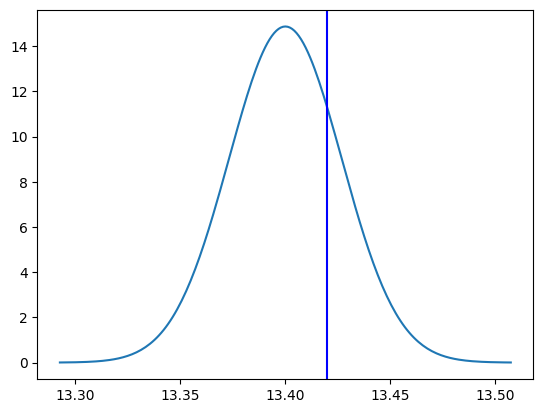

In [ ]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import random
import math

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns
# Properties of the sample: ( voorbeeld voor rechts)
n = 20              # Sample size
mu = 13.4          # (Hypothetical) population mean
sigma = 0.12         # Population standard deviation (assumed to be known)
m_sample = 13.42    # Sample mean
s_sample = sigma / math.sqrt(n)

# X-values
dist_x = np.linspace(mu - 4 * s_sample, mu + 4 * s_sample, num=201)
# Y-values for drawing the Gauss curve
dist_y = stats.norm.pdf(dist_x, mu, s_sample)
# Plot the Gauss-curve
plt.plot(dist_x, dist_y)

# Fill the area left of x
# plt.fill_between(dist_x, 0, dist_y, where=(dist_x <= x), color='lightblue')
# Show the mean with an orange line
plt.axvline(m_sample, color="blue");

### right tailed Z-**test**

In [ ]:
## voor interval van acceptance regio te krijgen voor rechts
z_crit_right = norm.ppf(1 - alpha)
print(f"Right-tailed Z-test: Verwerp H0 als Z ≥ {z_crit_right:.3f}")
print(f"Acceptance region: Z < {z_crit_right:.3f}")

In [ ]:
alpha = 0.05 # Significance level chosen by the researcher
p = stats.norm.sf(m_sample, loc=mu, scale=sigma/np.sqrt(n))

print("p-value: %.5f" % p)
if(p < alpha):
    print("p < alpha: reject H0")
else:
    print("p > alpha: do not reject H0")

p-value: 0.22803
p > alpha: do not reject H0


In [ ]:
# Critical value according to the formula:
#    g = mu + stats.norm.isf(alpha) * sigma / np.sqrt(n)
# Making use of the loc/scale parameters of isf:
g = stats.norm.isf(alpha, loc=mu, scale=sigma / np.sqrt(n))
print("Critical value g ≃ %.3f" % g)
if (m_sample < g):
    print("sample mean = %.3f < g = %.3f: do not reject H0" % (m_sample, g))
else:
    print("sample mean = %.3f > g = %.3f: reject H0" % (m_sample, g))

Critical value g ≃ 13.444
sample mean = 13.420 < g = 13.444: do not reject H0


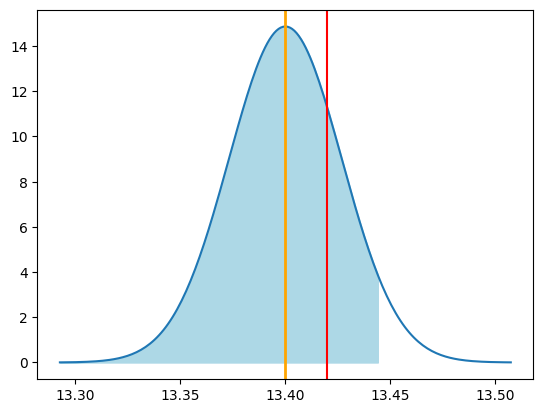

In [ ]:
# Gauss-curve plot:
# X-values
dist_x = np.linspace(mu - 4 * sigma/np.sqrt(n), mu + 4 * sigma/np.sqrt(n), num=201)
# Y-values for the Gauss curve
dist_y = stats.norm.pdf(dist_x, mu, sigma/np.sqrt(n))
fig, dplot = plt.subplots(1, 1)
# Plot the Gauss-curve
dplot.plot(dist_x, dist_y)
# Show the hypothetical population mean with an orange line
dplot.axvline(mu, color="orange", lw=2)
# Show the sample mean with a red line
dplot.axvline(m_sample, color="red")
# Fill the acceptance area in light blue
dplot.fill_between(dist_x, 0, dist_y, where=dist_x <= g, color='lightblue');

###  left-tailed Z-Test

In [ ]:
from scipy.stats import norm
# acceptance regio left
alpha = 0.05
z_crit_left = norm.ppf(alpha)

print(f"Left-tailed Z-test: Verwerp H0 als Z ≤ {z_crit_left:.3f}")
print(f"Acceptance region: Z > {z_crit_left:.3f}")


In [ ]:
# Properties of the sample: ( voorbeeld voor rechts)
n = 20              # Sample size
mu = 13.4          # (Hypothetical) population mean
sigma = 0.12         # Population standard deviation (assumed to be known)
m_sample = 13.38    # Sample mean
s_sample = sigma / math.sqrt(n)
alpha = 0.05
# Pay attention! Use cdf() instead of sf()! Why?
p = stats.norm.cdf(m_sample, loc=mu, scale=sigma/np.sqrt(n))

print("p-value: %.5f" % p)
if(p < alpha):
    print("p < a, reject H0")
else:
    print("p > a, do not reject H0")

p-value: 0.22803
p > a, do not reject H0


In [ ]:
# Critical value according to the formula in the lecture slides
# g = m0 - stats.norm.isf(a) * s / np.sqrt(n)
# Making use of the loc/scale parameters of isf:
g = stats.norm.isf(1-alpha, loc=mu, scale=(sigma / np.sqrt(n)))
print("Critical value g ≃ %.3f" % g)
if (m_sample > g):
    print("sample mean = %.3f > g = %.3f: do not reject H0" % (m_sample, g))
else:
    print("sample mean = %.3f < g = %.3f: reject H0" % (m_sample, g))

Critical value g ≃ 13.356
sample mean = 13.380 > g = 13.356: do not reject H0


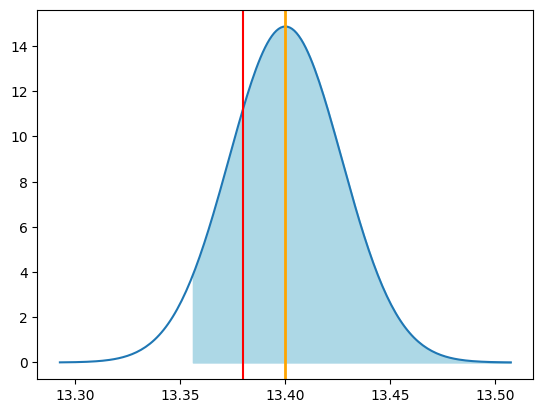

In [ ]:
# Gauss-curve:
# X-values
dist_x = np.linspace(mu - 4 * sigma/np.sqrt(n), mu + 4 * sigma/np.sqrt(n), num=201)
# Y-values
dist_y = stats.norm.pdf(dist_x, mu, sigma/np.sqrt(n))
fig, dplot = plt.subplots(1, 1)
# Plot
dplot.plot(dist_x, dist_y)
# Hypothetical population mean in orange
dplot.axvline(mu, color="orange", lw=2)
# Sample mean in red
dplot.axvline(m_sample, color="red")
# Fill the acceptance region in light blue
dplot.fill_between(dist_x, 0, dist_y, where=dist_x >= g, color='lightblue');

### two-tailed Z - test

In [ ]:
#accepttance regio two tailed
z_crit_two_tail = norm.ppf(1 - alpha/2)


print(f"Two-tailed Z-test: Verwerp H0 als Z ≤ {-z_crit_two_tail:.3f} of Z ≥ {z_crit_two_tail:.3f}")
print(f"Acceptance region: Z ∈ [ {-z_crit_two_tail:.3f}, {z_crit_two_tail:.3f} ]")


In [ ]:
# Properties of the sample:
n = 20              # Sample size
mu = 13.4          # (Hypothetical) population mean
sigma = 0.12         # Population standard deviation (assumed to be known)
m_sample = 13.41    # Sample mean
alpha = 0.05        # Significance level (chosen by the researcher)

In [ ]:
p = stats.norm.sf(m_sample, loc=mu, scale=sigma/np.sqrt(n))
print("p-waarde: %.5f" % p)
if(p < alpha/2):
    print("p < alpha/2, reject H0")
else:
    print("p > alpha/2, do not reject H0")

p-waarde: 0.35469
p > alpha/2, do not reject H0


In [ ]:
g1 = mu - stats.norm.isf(alpha/2) * sigma / np.sqrt(n)
g2 = mu + stats.norm.isf(alpha/2) * sigma / np.sqrt(n)

print("Acceptance region [g1, g2] ≃ [%.3f, %.3f]" % (g1,g2))
if (g1 < m_sample and m_sample < g2):
    print("Sample mean = %.3f is inside acceptance region: do not reject H0" % m_sample)
else:
    print("Sample mean = %.3f is outside acceptance region: reject H0" % m_sample)

Acceptance region [g1, g2] ≃ [13.347, 13.453]
Sample mean = 13.410 is inside acceptance region: do not reject H0


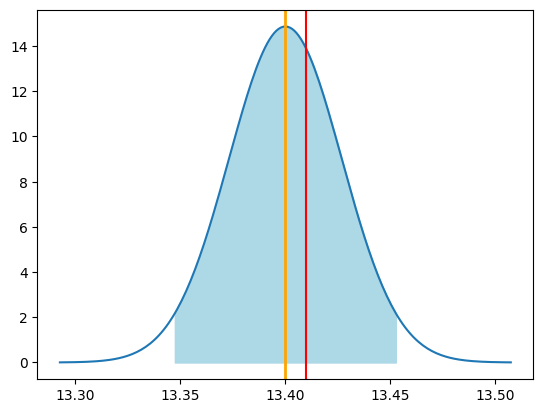

In [ ]:
# Gauss-curve
# X-values
dist_x = np.linspace(mu - 4 * sigma/np.sqrt(n), mu + 4 * sigma/np.sqrt(n), num=201)
# Y-values
dist_y = stats.norm.pdf(dist_x, loc=mu, scale=sigma/np.sqrt(n))
fig, dplot = plt.subplots(1, 1)
# Plot
dplot.plot(dist_x, dist_y)
# Hypothetical population mean in orange
dplot.axvline(mu, color="orange", lw=2)
# Sample mean in red
dplot.axvline(m_sample, color="red")
acc_x = np.linspace(g1, g2, num=101)
acc_y = stats.norm.pdf(acc_x, loc=mu, scale=sigma/np.sqrt(n))
# Fill the acceptance region in light blue
dplot.fill_between(acc_x, 0, acc_y, color='lightblue');

## T-test

*   if the underlying distribution is the normal distribution
*   if the variance or standarddeviation of the population is unknown




### between


In [7]:
# Gegeven parameters
mu = 13.4         # steekproefgemiddelde of verwachte waarde
s = 0.12          # steekproefstandaardafwijking
n = 20            # steekproefgrootte
df = n - 1        # vrijheidsgraden

# Bereken de standaardfout van het gemiddelde
se = s / (n ** 0.5)

# Bereken T-scores
t1 = (13.35 - mu) / se
t2 = (13.5 - mu) / se

# Kans dat X tussen 13.35 en 13.5 ligt onder de T-verdeling
p_within_t = stats.t.cdf(t2, df=df) - stats.t.cdf(t1, df=df)
print(f"P(13.35 < X < 13.5) (T-verdeling) = {p_within_t:.4f}")

P(13.35 < X < 13.5) (T-verdeling) = 0.9603


### one tailed T right

In [ ]:
from scipy.stats import norm, t
t_crit = t.ppf(1 - alpha, df=n-1)  # df = n-1

In [ ]:
scores = [6, 3, 6, 7, 6, 10, 6, 8, 7, 9, 3, 6, 4, 6, 8, 9, 5, 4, 6, 4, 6, 8, 10, 5, 4, 6, 4, 6, 6, 4, 5, 7, 8, 7, 5, 4, 8, 4, 5, 10, 7]
n = len(scores)
mu = 5.2
s = np.std(scores, ddof = 1)  # the standard deviation of the population is unknown
m_sample = np.mean(scores)
alpha = 0.05

print(f"Sample mean: {m_sample}")

Sample mean: 6.146341463414634


In [ ]:
p = stats.t.sf(m_sample, loc = mu, scale = s / math.sqrt(n), df = n - 1)
print(f"p-value: {p}")
if(p < alpha):
    print("p < alpha: reject H0")
else:
    print("p > alpha: do not reject H0")

p-value: 0.0014163864505844063
p < alpha: reject H0


In [ ]:
g = stats.t.isf(alpha, loc = mu, scale = s / math.sqrt(n), df = n - 1)
print("Critical value g ≃ %.3f" % g)
if (m_sample < g):
    print("sample mean = %.3f < g = %.3f: do not reject H0" % (m_sample, g))
else:
    print("sample mean = %.3f > g = %.3f: reject H0" % (m_sample, g))

Critical value g ≃ 5.701
sample mean = 6.146 > g = 5.701: reject H0


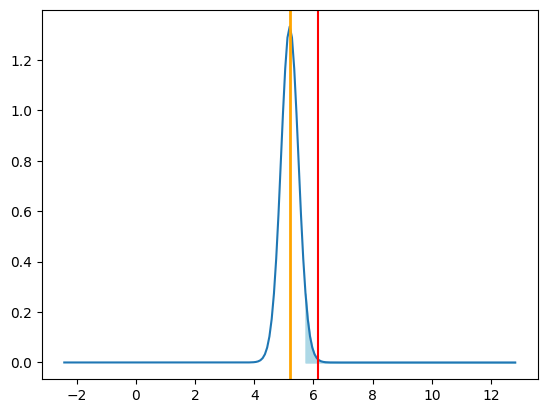

In [ ]:
# Gauss-curve
# X-values
dist_x = np.linspace(mu - 4 * s, mu + 4 * s, num=201)
# Y-values
dist_y = stats.t.pdf(dist_x, loc=mu, scale=s/np.sqrt(n), df=n-1)
fig, dplot = plt.subplots(1, 1)
# Plot
dplot.plot(dist_x, dist_y)
# Hypothetical population mean in orange
dplot.axvline(mu, color="orange", lw=2)
# Sample mean in red
dplot.axvline(m_sample, color="red")
# Fill the acceptance region in light blue
dplot.fill_between(dist_x, 0, dist_y, where=dist_x >= g, color='lightblue');

### left tailed T-test ttest gebruikt.

*   You have one sample of data.
*   You want to test if its mean significantly differs from a known or hypothesized population mean.
*   The data is assumed to be normally distributed (or approximately normal for large samples).
*   The standard deviation of the population is not known



In [ ]:
from scipy.stats import norm , t
# acceptance regio left
alpha = 0.05
t_crit_left = t.ppf(alpha)

print(f"Left-tailed t-test: Verwerp H0 als Z ≤ {z_crit_left:.3f}")
print(f"Acceptance region: Z > {z_crit_left:.3f}")

In [ ]:
study_times = [18,22,19,21,23,20,17,22,19,18,21,20,16,24,19]
alpha = 0.05
mu = 20

# P > alpha H0 blijft
# P < alpha H1 is het gene dat voorkomt
#right is H0 = gemiddelde is 20  H1 = gemiddelde is groter dan 20
#left is  H0 = gemiddelde is 20 H1 = gemiddelde is kleiner dan 20
#two sided H0 = gemiddelde is 20 H1 = gemiddelde is verschillend van 20

t_stat, p_val = stats.ttest_1samp(a=study_times, popmean=mu, alternative='less') # "greater" voor rechts en "two-sided" voor two sided voor two sided regio = t_crit = t.ppf(1 - alpha/2, df=n-1)
print("Sample mean        : %.3f" % np.mean(study_times))
print("t-score            : %.3f" % t_stat)
print(f"p-value           : {p_val}")

Sample mean        : 19.933
t-score            : -0.115
p-value           : 0.4551527949196003




### Verschil Tussen Kansverdelingsfuncties (PDF, CDF, SF, ISF)

| Functie | Volledige Naam | Wat het doet | Typische Vraag | Voorbeeld |
| :--- | :--- | :--- | :--- | :--- |
| **PDF** | **P**robability **D**ensity **F**unction (Kansdichtheidsfunctie) | [cite_start]Beschrijft de **relatieve waarschijnlijkheid** van een specifieke, exacte waarde [cite: 353-355]. | Hoe waarschijnlijk is een score van *precies* 85? | Een histogram of een vloeiende klokvormige curve is een visuele weergave van de PDF. De hoogte van de curve op een bepaald punt geeft de relatieve kansdichtheid weer. |
| **CDF** | **C**umulative **D**istribution **F**unction (Cumulatieve distributiefunctie) | Berekent de **opgetelde kans** dat een waarde *kleiner dan of gelijk aan* een bepaald punt is. | Wat is de kans dat een student *maximaal* een score van 85 haalt? | Gebruikt in examenvraag 5 om de kans te berekenen dat een student een score heeft **tussen 80 en 85**. Je berekent `P(score ≤ 85)` en trekt daar `P(score ≤ 80)` van af. |
| **SF** | **S**urvival **F**unction (Overlevingsfunctie) | Berekent de **opgetelde kans** dat een waarde *groter dan* een bepaald punt is. Het is het tegenovergestelde van de CDF (1 - CDF). | Wat is de kans dat een student *meer dan* een score van 85 haalt? | Gebruikt in examenvraag 5 om de kans te berekenen op een premie voor studenten die boven een bepaalde score uitkomen. |
| **ISF** | **I**nverse **S**urvival **F**unction (Inverse overlevingsfunctie) | Doet het omgekeerde van de SF. Je geeft een **kans (een percentage)** en de functie geeft de **waarde** terug die bij die kans hoort. | Welke score heb je nodig om bij de *top 5%* van de studenten te horen? | Om de score te vinden die slechts door 5% van de studenten wordt overschreden, gebruik je `norm.isf(0.05)`. [cite_start]Dit is ook hoe je de kritieke Z- of t-waarden vindt voor betrouwbaarheidsintervallen en hypothesetoetsen [cite: 384-385, 429-430]. |

# 🧠chi_kwadraat en T-test met 2 groepen

## T-toets voor 2 onafhankelijke groepen vb: mannen en vrouwen
Context: Vergelijk het gemiddelde inkomen van mannen en vrouwen.  
H0: Het gemiddelde inkomen van mannen = dat van vrouwen

H1: Het gemiddelde inkomen van mannen ≠ dat van vrouwen (two-tailed)

In [12]:
from scipy import stats
import numpy as np

group1 = np.array([5, 6, 7, 8, 9])
group2 = np.array([7, 8, 9, 10, 11])

t_stat, p_val = stats.ttest_ind(group1, group2)
print(f"T-statistic: {t_stat:.3f}, p-value: {p_val:.3f}")


T-statistic: -2.000, p-value: 0.081


##  T-toets voor 2 gekoppelde metingen (voor/na)
Context: Meet het effect van een training op testscores (voor en na).  
H0: Gemiddelde score voor = gemiddelde score na training

H1: Gemiddelde score voor ≠ gemiddelde score na training

In [13]:
before = np.array([20, 21, 19, 22, 20])
after = np.array([22, 23, 20, 24, 21])

t_stat, p_val = stats.ttest_rel(before, after)
print(f"T-statistic: {t_stat:.3f}, p-value: {p_val:.3f}")


T-statistic: -6.532, p-value: 0.003


## Chi²-test onafhankelijkheid (2 categorische variabelen)
Test of twee categorische variabelen onafhankelijk zijn (bv. geslacht en rookgedrag).  
H0: Geslacht en productvoorkeur zijn onafhankelijk

H1: Geslacht en productvoorkeur zijn niet onafhankelijk

In [14]:
import numpy as np
from scipy.stats import chi2_contingency

# Contingentietabel (observaties)
table = np.array([[30, 10],
                  [20, 40]])

chi2, p_val, dof, expected = chi2_contingency(table)
print(f"Chi2: {chi2:.3f}, p-value: {p_val:.3f}")


Chi2: 15.042, p-value: 0.000


## Chi² goodness-of-fit (1 categorische variabele vs. verwachte verdeling)
Context: Komt de verdeling van kleuren in een pakje M&M’s overeen met de fabrikant-specificatie?

H0: Geobserveerde kleurverdeling komt overeen met verwachte verdeling

H1: Geobserveerde kleurverdeling wijkt af van verwachte verdeling

In [15]:
from scipy.stats import chisquare

observed = np.array([50, 30, 20])
expected = np.array([40, 40, 20])

chi2, p_val = chisquare(f_obs=observed, f_exp=expected)
print(f"Chi2: {chi2:.3f}, p-value: {p_val:.3f}")


Chi2: 5.000, p-value: 0.082


## Cramér's V
$$V = \sqrt{\frac{χ²}{n(k-1)}}$$
- $n$ = Total observations
- $k$ = min(rows, columns) in contingency table

**Interpretatie:**

| \(V\)    | Sterkte van associatie |
|---------|-------------------------|
| 0       | Geen                    |
| 0.1     | Zwak                    |
| 0.25    | Matig                   |
| 0.5     | Sterk                   |
| >0.5    | Zeer sterk              |

In [16]:
import numpy as np
import pandas as pd

def cramers_v_from_chi2_and_df(chi2, df, col1, col2):
    """
    Bereken Cramér's V op basis van chi-kwadraatwaarde en 2 categorische kolommen uit een DataFrame.

    Parameters:
        chi2: float – de chi-kwadraatwaarde
        df: pandas DataFrame
        col1: naam van eerste categorische kolom
        col2: naam van tweede categorische kolom

    Returns:
        Cramér's V (float)
    """
    contingency = pd.crosstab(df[col1], df[col2])
    n = contingency.to_numpy().sum()
    k = min(contingency.shape)

    if k <= 1 or n == 0:
        return np.nan
    return np.sqrt(chi2 / (n * (k - 1)))

#///
chi2 = 6.0  # voorbeeldwaarde

# voorbeelddata
df = pd.DataFrame({
    'Geslacht': ['M', 'V', 'M', 'V', 'M', 'V', 'V', 'M'],
    'Voorkeur': ['A', 'B', 'A', 'B', 'A', 'A', 'B', 'B']
})

v = cramers_v_from_chi2_and_df(chi2, df, 'Geslacht', 'Voorkeur')
print(f"Cramér's V: {v:.4f}")


Cramér's V: 0.8660


# 🧠Pearson correlatie (numeriek vs. numeriek) + Lineaire regressie + correlatie + covariancie

##Pearson correlatie (numeriek vs. numeriek)
Context: Is er een lineair verband tussen studie-uren en examenresultaat?

H0: Geen lineair verband tussen studie-uren en resultaten (ρ = 0)

H1: Er is een lineair verband (ρ ≠ 0)

In [ ]:
from scipy.stats import pearsonr
import numpy as np

study_hours = np.array([2, 3, 4, 5, 6])
exam_scores = np.array([50, 55, 60, 65, 70])

corr, p_val = pearsonr(study_hours, exam_scores)
print(f"Pearson correlation: {corr:.3f}, p-value: {p_val:.3f}")


Pearson correlation: 1.000, p-value: 0.000


##Lineaire regressie
Context: Voorspel het gewicht van een persoon aan de hand van lengte.

H0: Geen lineair verband tussen lengte en gewicht (slope = 0)

H1: Er is een lineair verband (slope ≠ 0)



In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = np.array([[160], [165], [170], [175], [180]])
y = np.array([60, 65, 70, 72, 75])
x = np.array([160, 165 , 170 , 175 , 180])

a, b = np.polyfit(x , y, 1)

print(f'y= {a} * X + {b}')

model = LinearRegression().fit(X, y)
print(f"Coef (slope): {model.coef_[0]:.3f}, Intercept: {model.intercept_:.3f}")

cor = np.corrcoef(x,y)[0][1]
print(f"R = { cor }")
print(f"R² = {cor ** 2}")


y= 0.7399999999999995 * X + -57.39999999999993
Coef (slope): 0.740, Intercept: -57.400
R = 0.9846556465128464
R² = 0.9695467422096316


**Interpretation**

| $abs(R)$  |  $R^2$   | Explained variance |   Linear relation    |
| :-------: | :------: | :----------------: | :------------------: |
|   < .3    |   < .1   |       < 10%        |      very weak       |
|  .3 - .5  | .1 - .25 |     10% - 25%      |         weak         |
|  .5 - .7  | .25 - .5 |     25% - 50%      |       moderate       |
| .7 - .85  | .5 - .75 |     50% - 75%      |        strong        |
| .85 - .95 | .75 - .9 |     75% - 90%      |     very strong      |
|   > .95   |   > .9   |       > 90%        | exceptionally strong |

## Covariance
Measures **direction** of linear relationship:  
$Cov(X,Y) = \frac{1}{n-1}\sum_{i=1}^n(X_i - \bar{X})(Y_i - \bar{Y})$

In [ ]:
np.cov(
    df.columnName,
    df.columnName,
    ddof=1)[0][1] #ddof = 1 -> unbiased sample

**Covariance Interpretation**:
- $Cov > 0$: Variables move together (X↑ → Y↑)
- $Cov < 0$: Variables move inversely (X↑ → Y↓)
- $Cov ≈ 0$: No linear relationship

## correlatie
Measures **strength and direction** of linear relationship:  
$R = \frac{Cov(X,Y)}{\sigma_X\sigma_Y}$


In [ ]:
# Python function numpy.corrcoef() - returns a matrix, like numpy.cov()
corr = np.corrcoef(
    df.columnName,
    df.columnName)[0][1]
print(f"R ≈ {corr:.4f}")

**Properties**:
- Unitless (-1 ≤ R ≤ 1)
- R > 0: Positive linear relationship
- R < 0: Negative linear relationship
- R = 0: No linear relationship

### 🎯Coëfficiënt van determinatie (R-squared of r²)

De coëfficiënt van determinatie, aangeduid als **R-squared** of **r²**, is een maatstaf die aangeeft hoe goed een model de variantie in de afhankelijke variabele verklaart op basis van de onafhankelijke variabele(n).

Deze metriek wordt gebruikt om:
- de **model fit** te beoordelen,
- **modellen met elkaar te vergelijken**,
- en te interpreteren welk deel van de variantie verklaard wordt door het model.

**Interpretatie:**
- Een **r² van 0** duidt op een zwakke correlatie of een slecht passend model.
- Een **r² van 1** wijst op een perfecte correlatie en een uitstekend passend model.
- Bijvoorbeeld: een **R² ≈ 0.64** betekent dat **64% van de variantie** in de afhankelijke variabele (bv. *Bwt*) wordt verklaard door de onafhankelijke variabele (bv. *Hwt*).

> Hoe dichter r² bij 1 ligt, hoe beter het model in staat is om de variatie in de uitkomstvariabele te verklaren.


In [11]:
import numpy as np
from sklearn.metrics import r2_score

# Stel voorbeeldgegevens in
# X = onafhankelijke variabele (bijv. Hwt)
# y = afhankelijke variabele (bijv. Bwt)
X = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

# Eenvoudige lineaire regressie fitten
# We gebruiken np.polyfit om een lijn y = a*x + b te vinden
coeffs = np.polyfit(X, y, deg=1)
a, b = coeffs
y_pred = a * X + b

# 1. ✅ Handmatige berekening van R²
ss_res = np.sum((y - y_pred) ** 2)             # Residual sum of squares
ss_tot = np.sum((y - np.mean(y)) ** 2)         # Total sum of squares
r_squared_manual = 1 - (ss_res / ss_tot)

# 2. ✅ Berekening met sklearn
r_squared_sklearn = r2_score(y, y_pred)

# Resultaten afdrukken
print(f"R² (handmatig): {r_squared_manual:.4f}")
print(f"R² (sklearn):   {r_squared_sklearn:.4f}")


R² (handmatig): 0.6000
R² (sklearn):   0.6000


#🧠Exponentiële afvlakking (tijdreeksvoorspelling)


##Exponentiële afvlakking (tijdreeksvoorspelling)
Context: Voorspel de toekomstige verkoop op basis van historische maandelijkse data.

In [ ]:
import pandas as pd
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

sales = pd.Series([200, 220, 215, 240, 230])
model = SimpleExpSmoothing(sales).fit(smoothing_level=0.3)
forecast = model.forecast(2)
print(forecast)


5    221.663
6    221.663
dtype: float64


/usr/local/lib/python3.11/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


###Plot alles mogelijkheden

<ipython-input-106-9f661fa62f75>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index=pd.date_range(start='2023-01', periods=12, freq='M'))


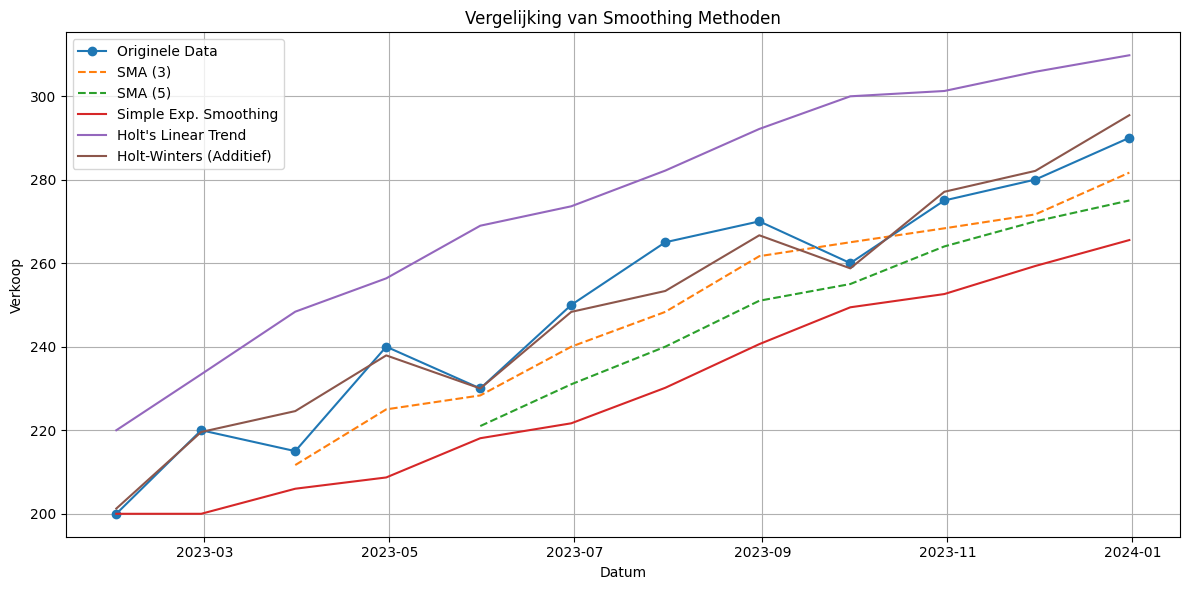

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing

# Voorbeeld tijdreeks (verkoopdata per maand)
sales = pd.Series([200, 220, 215, 240, 230, 250, 265, 270, 260, 275, 280, 290],
                  index=pd.date_range(start='2023-01', periods=12, freq='M'))

# Simple Moving Averages
sma_3 = sales.rolling(window=3).mean()
sma_5 = sales.rolling(window=5).mean()

# Simple Exponential Smoothing
ses = SimpleExpSmoothing(sales).fit(smoothing_level=0.3, optimized=False)
ses_forecast = ses.fittedvalues

# Holt (met trend)
holt = Holt(sales).fit(smoothing_level=0.3, smoothing_trend=0.1, optimized=False)
holt_forecast = holt.fittedvalues

# Holt-Winters (trend + seizoen)
hw = ExponentialSmoothing(sales, trend='add', seasonal='add', seasonal_periods=4).fit()
hw_forecast = hw.fittedvalues

# Plot
plt.figure(figsize=(12, 6))
plt.plot(sales, label='Originele Data', marker='o')
plt.plot(sma_3, label='SMA (3)', linestyle='--')
plt.plot(sma_5, label='SMA (5)', linestyle='--')
plt.plot(ses_forecast, label='Simple Exp. Smoothing')
plt.plot(holt_forecast, label="Holt's Linear Trend")
plt.plot(hw_forecast, label='Holt-Winters (Additief)')

plt.title('Vergelijking van Smoothing Methoden')
plt.xlabel('Datum')
plt.ylabel('Verkoop')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#🧠Data manipuleren

##Geef datatypes kolom

In [ ]:
import pandas as pd

# Voorbeelddata (vervang dit door jouw echte data inlezen via pd.read_csv of andere bron)
data = {
    'date': ['2020-01-01', '2020-02-01', '2020-03-01'],
    'employees': [395, 402, 410]
}
df = pd.DataFrame(data)

# Toon de datatypes
print(df.dtypes)


date         object
employees     int64
dtype: object


##Conversie naar datetime

In [ ]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')


##Plot maken

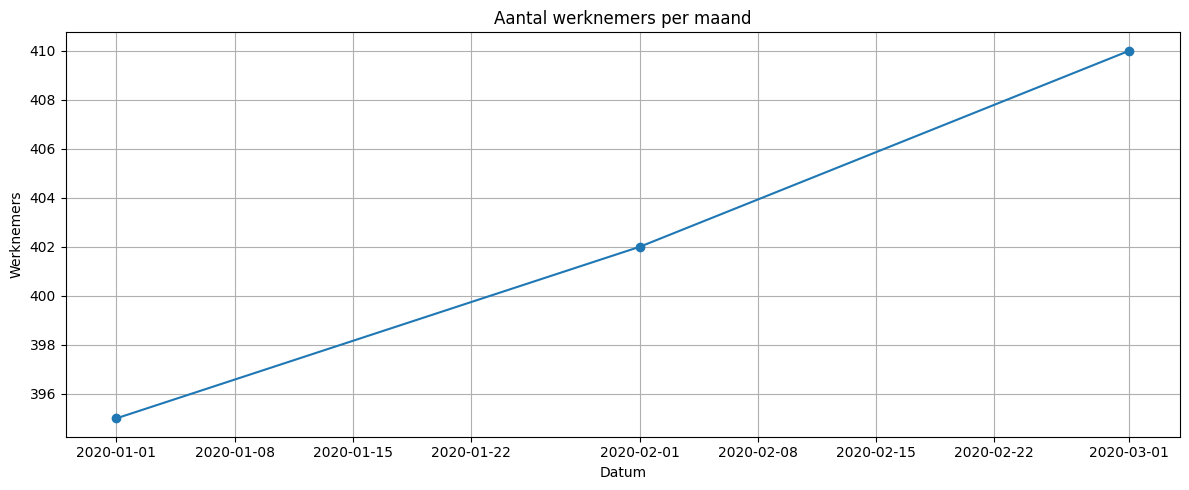

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(df['date'], df['employees'], marker='o')
plt.title('Aantal werknemers per maand')
plt.xlabel('Datum')
plt.ylabel('Werknemers')
plt.grid(True)
plt.tight_layout()
plt.show()


# 📏 Cohen's d

**Cohen's d** meet het gestandaardiseerde verschil tussen twee gemiddelden.  
Het geeft een indicatie van de **praktische relevantie**, zelfs wanneer een verschil statistisch significant is.

### ✅ Wat doet Cohen's d?
- Meet **effectgrootte** (hoe groot is het verschil, los van steekproefgrootte)
- Drukt verschil uit in **standaarddeviatie-eenheden**
- Helpt inschatten of een verschil **praktisch betekenisvol** is

### 📊 Interpretatiegids

| Cohen's d | Effectgrootte |
|-----------|----------------|
| 0.2       | Klein          |
| 0.5       | Medium         |
| 0.8       | Groot          |

> ⚠️ Let op: deze richtlijnen zijn algemeen — interpretatie kan verschillen per vakgebied.
### 📘 Samengevat

| Vergelijkt Cohen's d...                                                        | Antwoord |
|--------------------------------------------------------------------------------|----------|
| Sample vs populatie                                                            | ❌ Nee   |
| Twee gemiddelden binnen een sample (bv. twee groepen)                          | ✅ Ja    |
| De grootte van een effect onafhankelijk van de p-waarde                        | ✅ Ja    |


In [10]:
import numpy as np

# Voorbeeldgegevens
groep1 = [13.5, 13.7, 13.6, 13.4, 13.5]  # bv. controlegroep
groep2 = [13.9, 14.0, 13.8, 14.1, 13.9]  # bv. experimentele groep

# Gemiddelden en standaarddeviaties
mean1 = np.mean(groep1)
mean2 = np.mean(groep2)
std1 = np.std(groep1, ddof=1)  # ddof=1 → steekproefstandaardafwijking
std2 = np.std(groep2, ddof=1)

# Gepoole standaardafwijking
pooled_std = np.sqrt(((std1**2 + std2**2) / 2))

# Cohen's d
cohens_d = (mean2 - mean1) / pooled_std
print(f"Cohen's d = {cohens_d:.3f}")

# Interpretatie
if abs(cohens_d) < 0.2:
    effect = "verwaarloosbaar"
elif abs(cohens_d) < 0.5:
    effect = "klein"
elif abs(cohens_d) < 0.8:
    effect = "medium"
else:
    effect = "groot"

print(f"Effectgrootte volgens Cohen's d: {effect}")


Cohen's d = 3.508
Effectgrootte volgens Cohen's d: groot
